# Background & Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

# Data Dictionary 

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
%%time
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import tree
import scipy.stats as stats


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To impute missing values
from sklearn.impute import KNNImputer

Wall time: 2.58 s


# EDA
## View the dataset

In [2]:
df = pd.read_excel("Credit Card Customer Data.xlsx")
data = df.copy() # let us make another copy of data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 660 rows and 7 columns.


In [3]:
data.head(5) # Exploring first 10 rows of the data set

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
np.random.seed(42)  # To get the same random results every time
data.sample(n=10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
629,630,76203,155000,8,0,7,2
499,500,65825,68000,6,4,2,2
135,136,45583,15000,3,2,3,6
480,481,76024,47000,6,2,0,0
90,91,18007,13000,2,1,4,6
456,457,17325,41000,6,5,2,3
304,305,30712,16000,4,4,2,4
235,236,83290,13000,7,4,0,0
72,73,27120,11000,3,1,2,6
532,533,47848,48000,4,3,2,2


In [5]:
np.random.seed(1)  # To get the same random results every time
data.sample(n=10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [6]:
data.tail(5) # Exploring last 10 rows of the data set

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations**
- There are total 7 columns and 660 observations in the dataset.
- We can see that no columns have less than 660 non-null values i.e. no missing values.

In [8]:
(data.isnull() | data.eq('')).values.any() # If there are any null or missing values in data set; 

# Pandas will recognize both empty cells and “NA” types as missing values
# To detect NaN values numpy uses np.isnan().
# To detect NaN values pandas uses either .isna() or .isnull().
# The NaN values are inherited from the fact that pandas is built on top of numpy, 
# while the two functions' names originate from R's DataFrames, whose structure and functionality pandas tried to mimic.

False

**Observations**
- Confirmed no missing values in dataset.

In [9]:
# Check the unique value counts in each column of the dataframe.
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Observations**
- We can drop the column Sl_No as it is unique for each record and will not add value to the model.
- We can also drop the column Customer Key as it is the Customer identification number and will not add value to the model.

In [10]:
data.drop(["Sl_No"],axis=1,inplace=True) # Remove Sl_No column and use python #no. ; inplace means no make copy

In [11]:
data[data.duplicated()].count() # Find out duplicates in the data set

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Observations**
- There are no duplicate entries for the dataset.

In [12]:
data.drop(["Customer Key"],axis=1,inplace=True) # Remove Sl_No column and use python #no. ; inplace means no make copy

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [14]:
# Viewing possible variable values
for column in data.columns:
    print(data[column].value_counts())
    print('-'*30)

8000      35
6000      31
9000      28
13000     28
10000     26
19000     26
7000      24
11000     24
18000     23
14000     23
17000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
38000      8
50000      8
56000      7
39000      7
68000      7
52000      6
37000      6
34000      6
30000      6
74000      6
47000      6
48000      6
41000      6
60000      5
29000      5
26000      5
65000      5
31000      5
54000      4
51000      4
59000      4
73000      4
71000      4
49000      4
69000      4
64000      4
66000      4
33000      4
28000      3
67000      3
62000      3
100000     3
72000      3
61000      3
58000      3
44000      3
45000      3
46000      3
57000      3
40000      3
163000     2
84000      2
27000      2
32000      2
75000      2
42000      2
166000     2
156000     2
172000     2
195000     2
35000      2
63000      2
123000     1
171000     1
186000     1
157000     1
126000     1
121000     1
144000     1

**Observations**
- Initial assessment suggests values are correct and consistent in the variables.

## Summary of the dataset

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # data.describe display in 2 decimal places
data.info()
data.describe().T # View summary of dataset numerical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.00,34574.24,37625.49,3000.00,10000.00,18000.00,48000.00,200000.00
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


**Observations**
- Avg_Credit_Limit is right skewed with mean higher than median meaning majority customers have lower average credit limit than the mean and outliers on the higher end.
- Total_Credit_Cards has a rough normal distribution with close mean and median.
- Total_visits_bank has a rough normal distribution with close mean and median.
- Total_visits_online is right skewed with mean higher than median meaning majority customers made 2 or less logins or visited bank site online annually.
- Total_calls_made is right skewed with mean higher than median meaning majority customers made 3 or less calls to the bank or customer service annually.

## Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


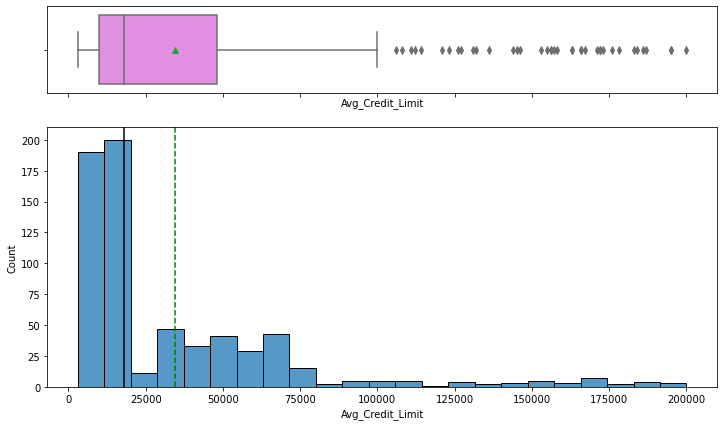

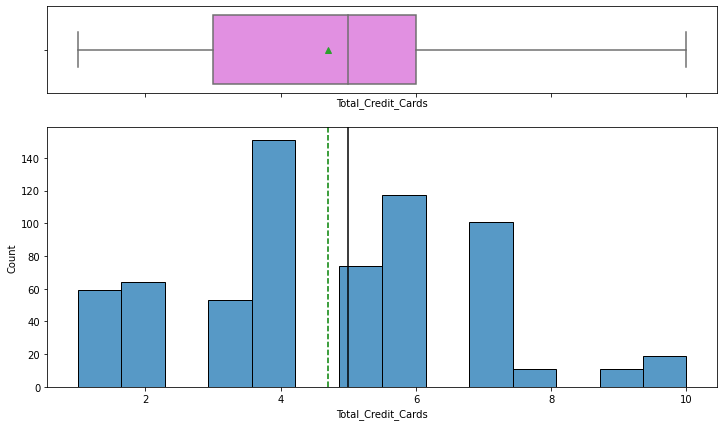

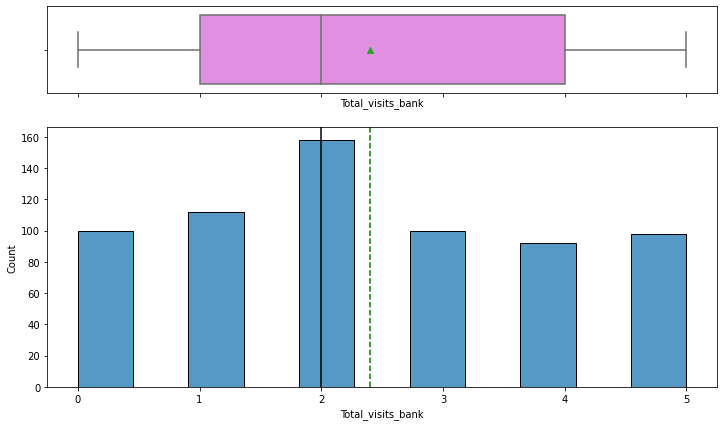

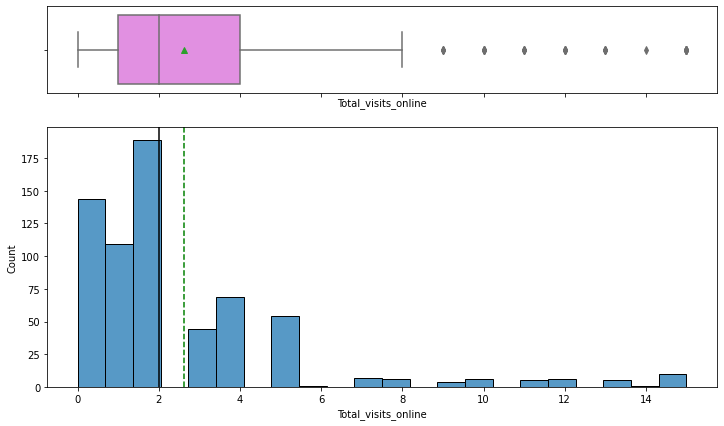

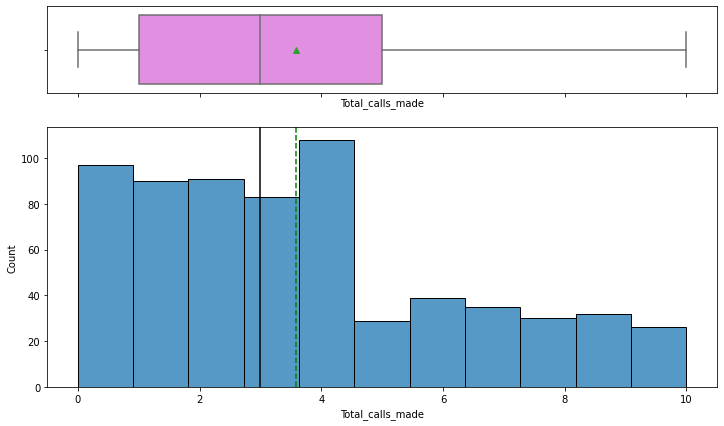

In [18]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)

In [19]:
#Finding Upper and lower whisker values of Avg_Credit_Limit
upper_quartile = np.percentile(data.Avg_Credit_Limit, 75)
lower_quartile = np.percentile(data.Avg_Credit_Limit, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Avg_Credit_Limit[data.Avg_Credit_Limit<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Avg_Credit_Limit[data.Avg_Credit_Limit>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

100000

3000

In [20]:
# Avg_Credit_Limit Outlier Rows
data[data.Avg_Credit_Limit >100000]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
615,131000,9,1,10,1
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0
620,108000,10,0,15,1
621,166000,9,1,12,2
622,176000,10,1,15,2
623,166000,10,0,7,0


In [21]:
# Avg_Credit_Limit Outlier Number of Rows in Avg_Credit_Limit variable
data.Avg_Credit_Limit[data.Avg_Credit_Limit >100000].count()

39

In [22]:
#Finding Upper and lower whisker values of Total_visits_online
upper_quartile = np.percentile(data.Total_visits_online, 75)
lower_quartile = np.percentile(data.Total_visits_online, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Total_visits_online[data.Total_visits_online<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Total_visits_online[data.Total_visits_online>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

8

0

In [23]:
# Total_visits_online Outlier Rows
data[data.Total_visits_online >8]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
4,100000,6,0,12,3
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0
615,131000,9,1,10,1
616,96000,10,1,11,2
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0


In [24]:
# Total_visits_online Outlier Number of Rows in Avg_Credit_Limit variable
data.Total_visits_online[data.Total_visits_online >8].count()

37

**Observations**
- Avg_Credit_Limit is skewed to the right with majority customers having lower credit limit than the mean and outliers on the higher end constituting 5.9% of customers or 39 customers.
- Total_visits_online is skewed to the right with majority customers visiting or login to the bank online site less than the mean, translating to 2 logins or less yearly but there are outliers on the higher end constituting 5.6% of customers or 37 customers.
- Total_calls_made is right skewed with majority customers calling less than the mean, translating to 3 or less calls to the bank or customer service annually and no outliers.
- Total_Credit_Cards, Total_visits_bank follow a roughly normal distribution with no outliers. 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


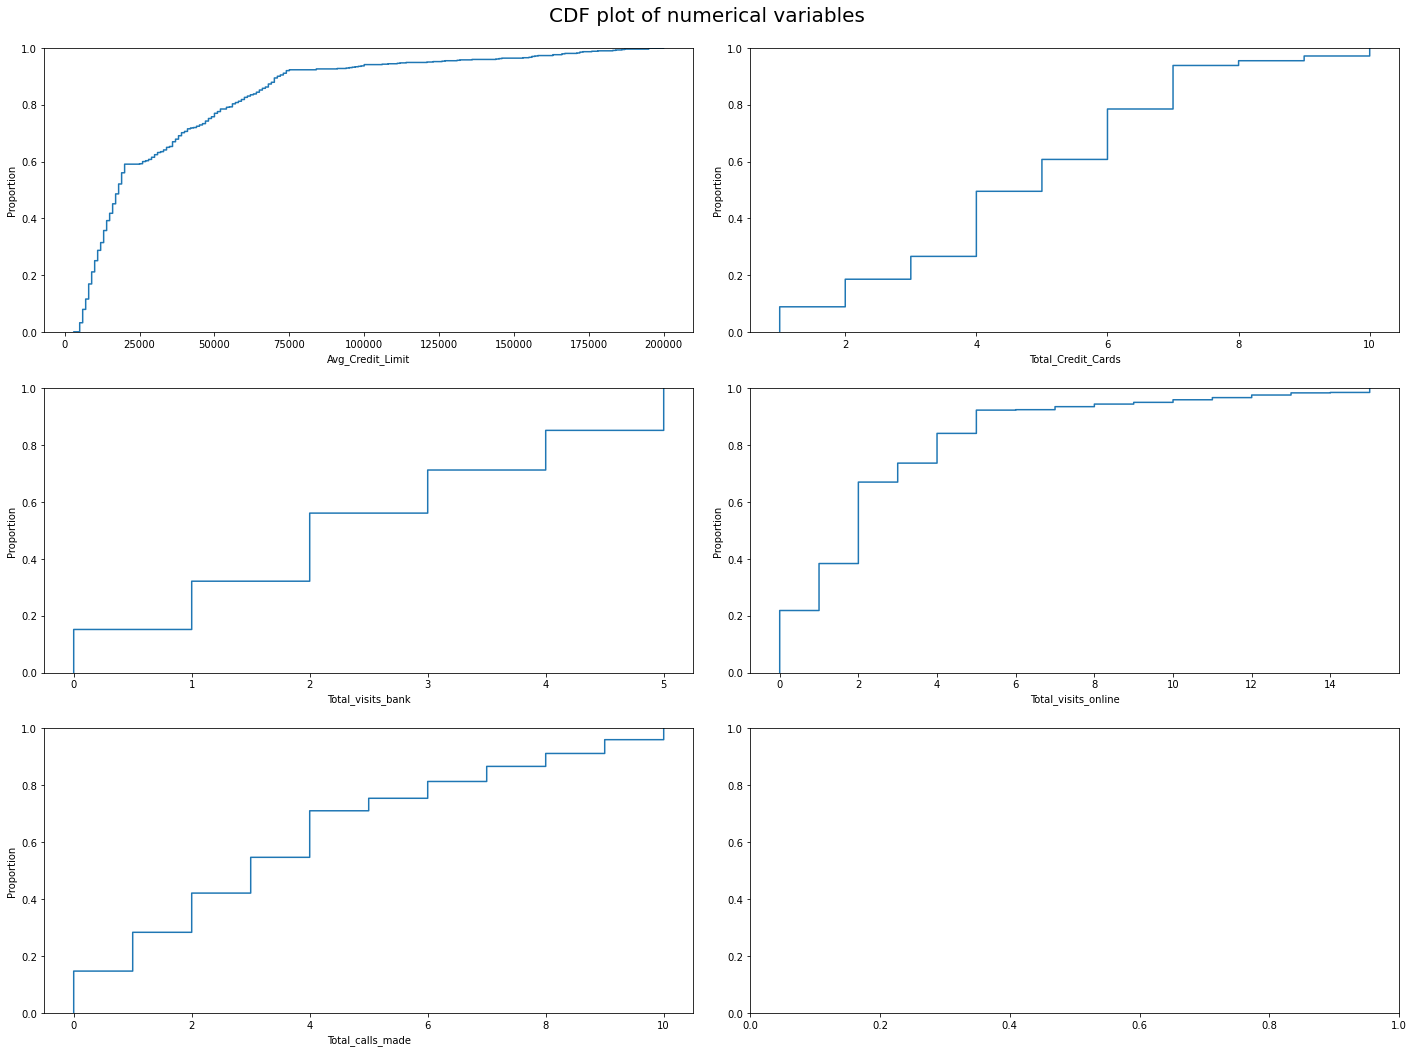

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[data.columns[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[data.columns[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- 90% of customers have Avg Credit Limit of 75000 or less.
- 80% of customers have 7 credit cars in total or less.
- 60% of customers have visited the bank personally for 3 times or less annually.
- 90% of customers have logged in or visited bank site online for up to 5 times annually.
- 70% of customers have called the bank or customer service at most 4 times annually.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [28]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
    plt.show() # show the plot

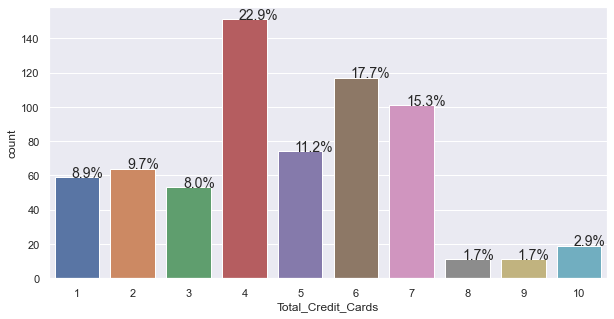

In [29]:
perc_on_bar(data['Total_Credit_Cards']) 

**Observations**
- The bulk of customers have total credit cards numbering between 4 to 7.

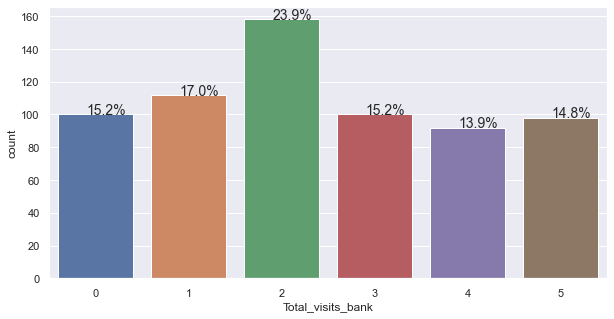

In [30]:
perc_on_bar(data['Total_visits_bank']) 

**Observations**
- Most customers visited the bank personally 2 or less times yearly.

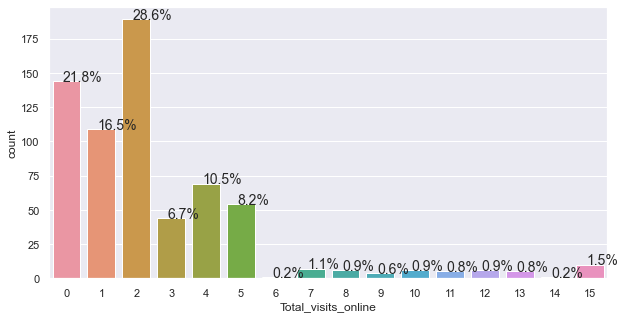

In [31]:
perc_on_bar(data['Total_visits_online']) 

**Observations**
- The majority of customers made 2 or less logins or visited bank site online annually.

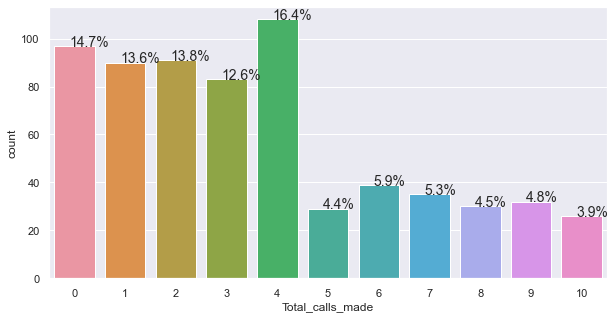

In [32]:
perc_on_bar(data['Total_calls_made']) 

**Observations**
- The majority of customers made 3 to 4 or less calls to the bank or cutomer service yearly.

## Bivariate Analysis

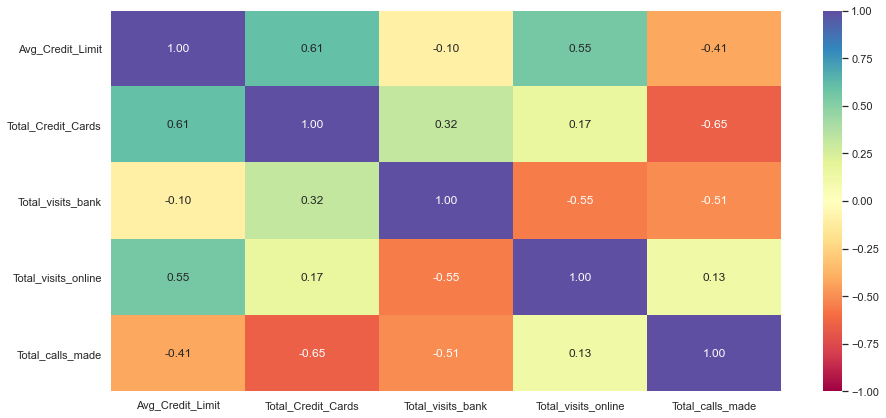

In [33]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[data.columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


**Observations**
- Total_Credit_Cards and Avg_Credit_Limit seem to be correlated (0.61) suggesting that customers who have higher number of credit cards are able to secure a higher average credit limit based on their higher income bracket and perhaps credit rating.
- Total_visits_online and Avg_Credit_Limit seem to be correlated (0.55) suggesting those with higher average credit limit accessed the bank services more online.
- Total_calls_made is negatively correlated to Total_Credit_Cards (-0.65), Total_visits_bank (-0.51) and Avg_Credit_Limit (-0.41) suggesting that the more calls made, the less total number of credit cards customers will have with the bank, less visits perhaps to sign up or utilize more personal services and gain less average credit limit perhaps due to less credit cards with the bank. This could be because of unsatisfactory services resulting in calls made to customer service. 
- Total_visits_online and Total_visits_bank seem negatively correlated (-0.55) which is perhaps logical given that customers who can use the banks services online will less likely visit the bank personally and vice versa.

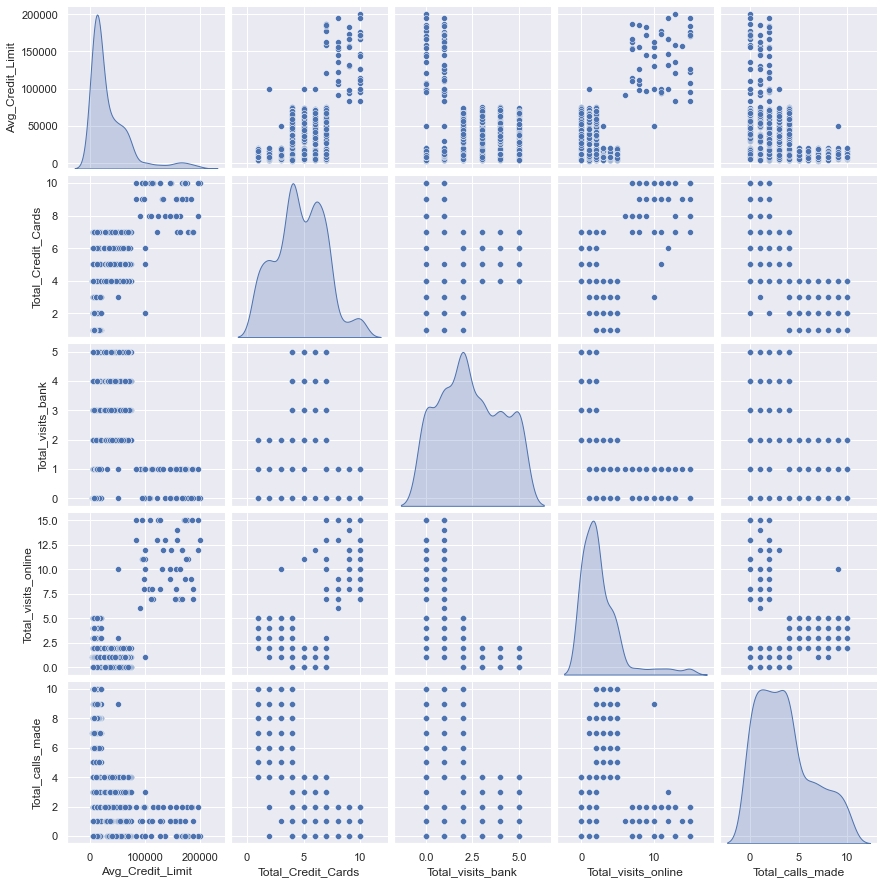

In [35]:
sns.pairplot(data=data[data.columns], diag_kind="kde")
plt.show()

**Observations**
- There appears to be distinct groups of customers with higher average credit limits using the bank online services more while those with lower average credit limits use online services less.
- Customers with higher number of credit cards also use more bank online services and vice versa forming 2 distinct groups.
- Customers also made less calls when they use more bank online services.
- Customers with higher average credit limit have higher numbers of credit cards.
- From the kde plots with the number of peaks shown, it is estimated that at least 2 to 3 clusters are needed.

## EDA Business Insights
- Customers who command a higher average credit limit have higher total credit card numbers and they also utilized the bank's online services suggesting a distinct premium customer segment who are more tech savvy in managing their banking needs.
- Customers who made more calls to the bank annually visited the banks less, commanded a lower average credit limit, have less credit cards suggesting a distinct budget customer segment who may be less tech savvy yet they need to make more calls to the customer service or the bank to resolve their issues. They utilize less of the personal services of the bank by visiting the bank less further reinforcing the possible scenario of this customer segment not being satisfied with the bank's services.
- Customers who use online services more visit the bank less and called the bank less suggesting a customer segment more satisfied with the bank's services but they require less of the bank's physical store assets.

# Data Preprocessing

## Missing Values & Duplicate Values
- It has been found earlier in the EDA viewing the dataset, that there are no missing nor duplicate values.

## Treating Outliers

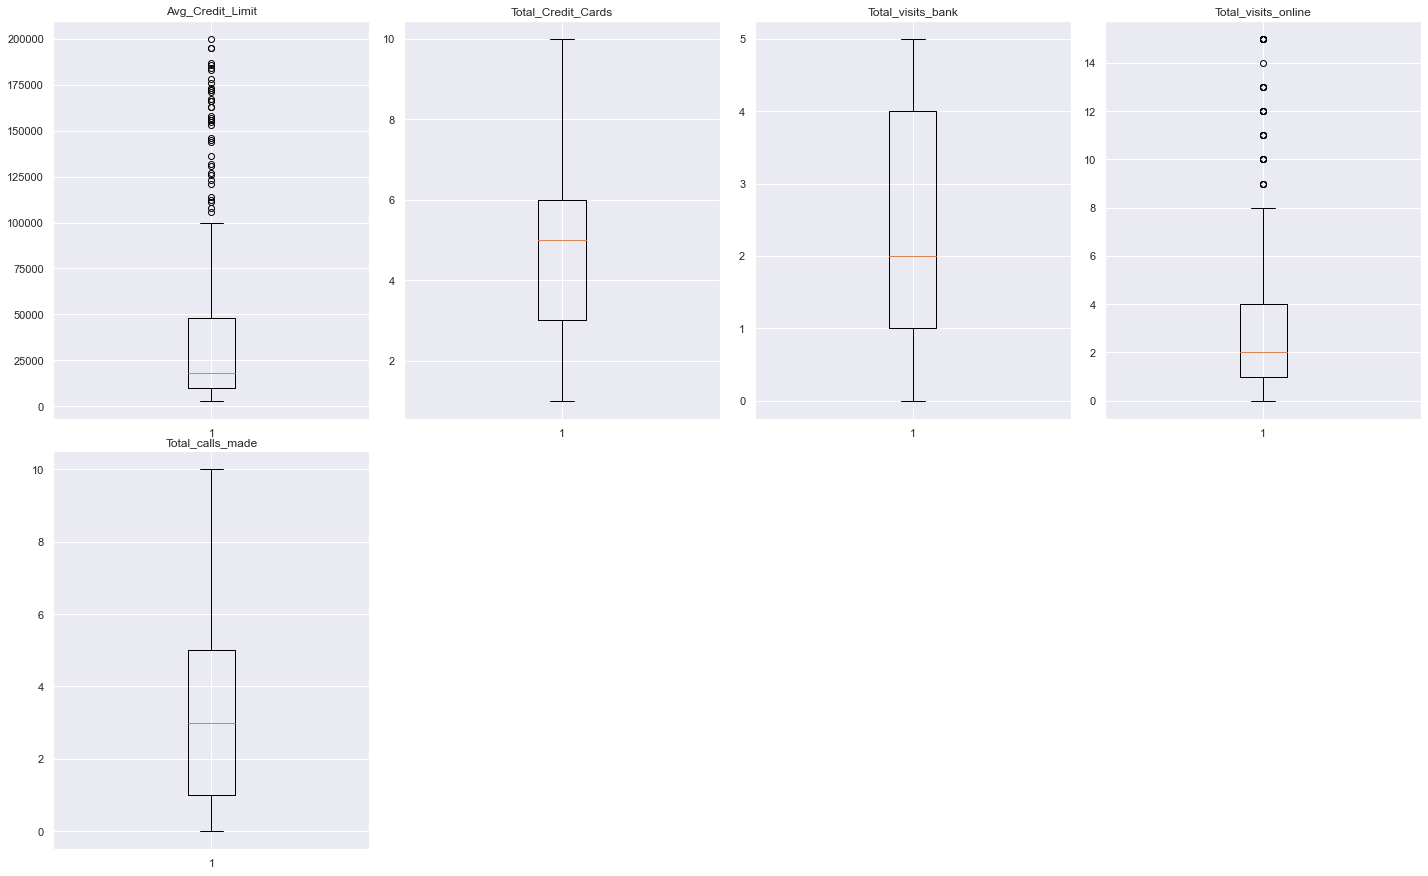

In [36]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***

The following variables have outliers:
- Avg_Credit_Limit (5.9% of observations)
- Total_visits_online (5.6% of observations)

In [37]:
# Lets treat outliers by flooring and capping
def treat_outliers(dataf,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    dataf: data frame
    col: name of the column
    '''
    Q1=dataf[col].quantile(0.25) # 25th quantile
    Q3=dataf[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    dataf[col] = np.clip(dataf[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return dataf

def treat_outliers_all(dataf, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    dataf: data frame
    '''
    for c in col_list:
        dataf = treat_outliers(dataf,c)
        
    return dataf

In [38]:
data = treat_outliers_all(data,num_col)

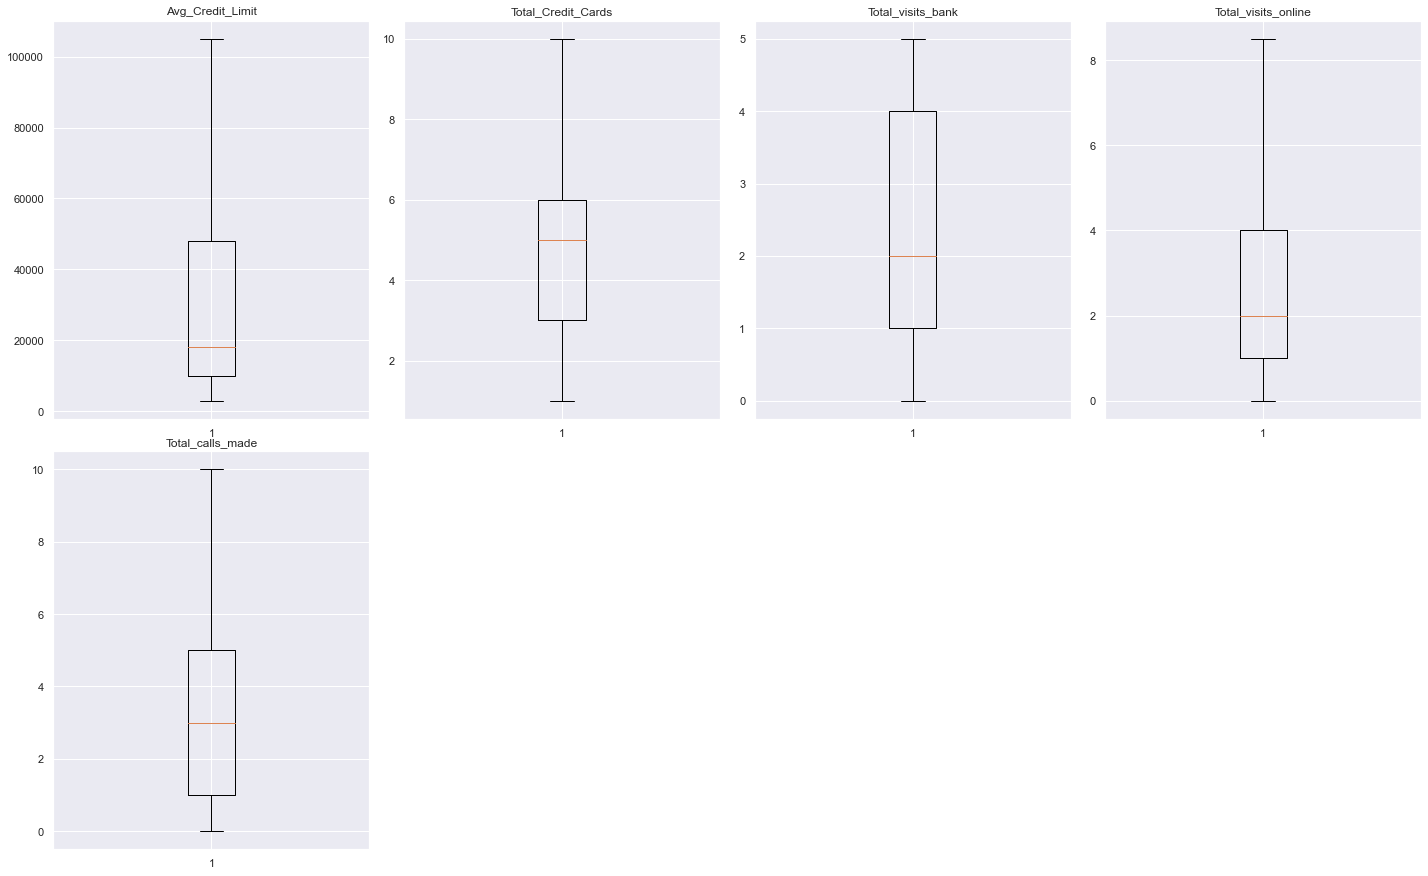

In [39]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***
- Outliers are treated.

## Scaling Data set for Clustering

In [40]:
# variables used for clustering
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [41]:
# scaling the dataset before clustering
# !pip install yellowbrick
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [42]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.0731463576129583
Number of Clusters: 2 	Average Distortion: 1.4986141501796377
Number of Clusters: 3 	Average Distortion: 1.1823298853410935
Number of Clusters: 4 	Average Distortion: 1.0711026440504199
Number of Clusters: 5 	Average Distortion: 1.0048977741354532
Number of Clusters: 6 	Average Distortion: 0.952025998780971
Number of Clusters: 7 	Average Distortion: 0.9149652173190401
Number of Clusters: 8 	Average Distortion: 0.89153996591753


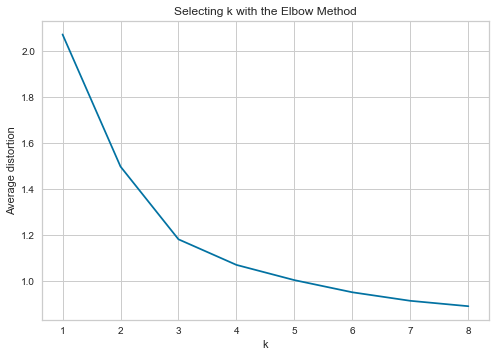

In [43]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Observations**
- Appropriate value for k seems to be 2 or 3.

For n_clusters = 2, the silhouette score is 0.4201583924929177)
For n_clusters = 3, the silhouette score is 0.5169867470092899)
For n_clusters = 4, the silhouette score is 0.38147048130671246)
For n_clusters = 5, the silhouette score is 0.3532334964432928)
For n_clusters = 6, the silhouette score is 0.27148649771431255)
For n_clusters = 7, the silhouette score is 0.26753553661965246)
For n_clusters = 8, the silhouette score is 0.2559645178889122)
For n_clusters = 9, the silhouette score is 0.244468186070905)


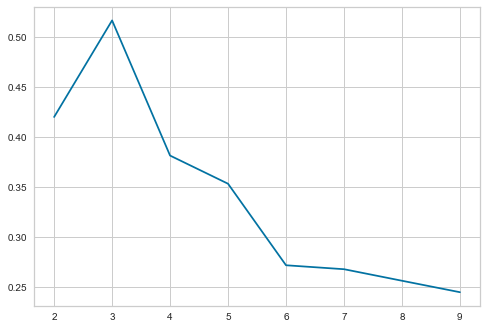

In [44]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Observations**
- Silhouette score for 3 is higher than that for 2. So, we will choose 3 as value of k.

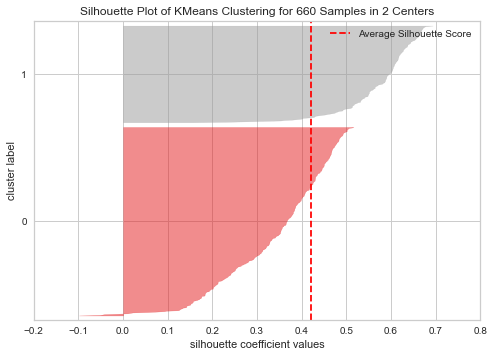

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

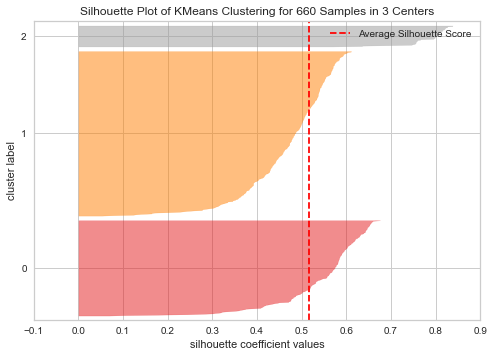

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [47]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=42)

In [48]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

# K-Means Cluster Profiling

In [49]:
cluster_profile = data.groupby("K_means_segments").mean()

In [50]:
data.K_means_segments.value_counts()

2    386
0    224
1     50
Name: K_means_segments, dtype: int64

In [51]:
cluster_profile['count_in_each_segment'] = data.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [52]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.11,2.41,0.93,3.55,6.87,224
1,102660.00,8.74,0.60,8.18,1.08,50
2,33782.38,5.52,3.49,0.98,2.00,386


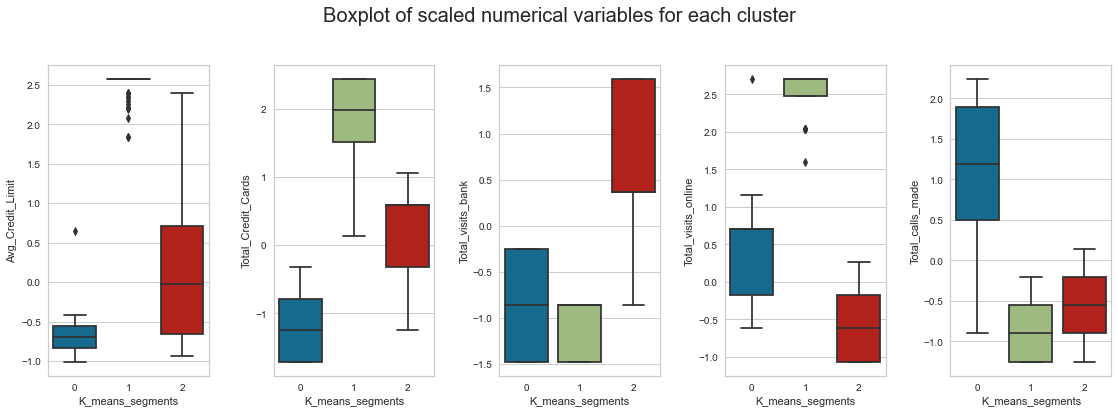

In [53]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

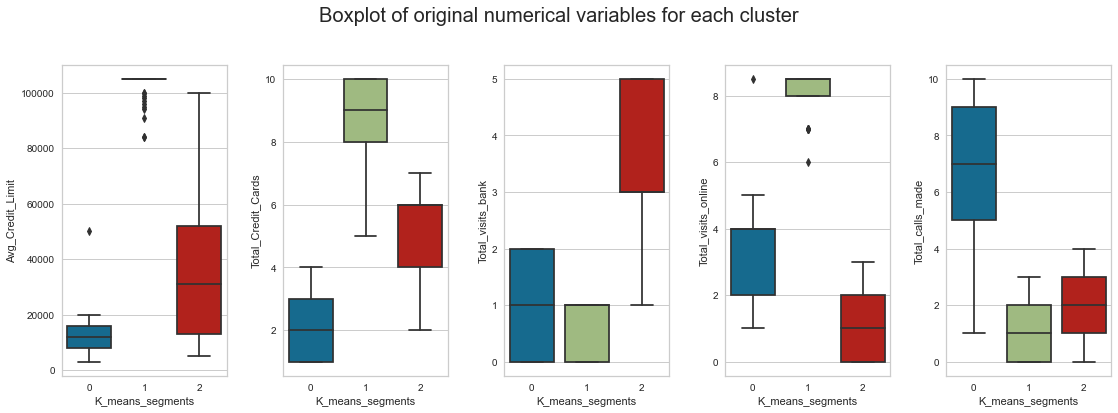

In [54]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0: The Dissatisfied Budget Customer**
    - This customer segment cluster has the lowest Average Credit Limit. 
    - They also have the lowest number of credit cards.
    - They visit the bank annually ranging from 0 to 2 times with an average of 1 time.
    - 50% of them visit or do online logins 2 to 4 times to the bank's website yearly.
    - They clock the highest number of calls to the banks with 50% of them making 5 to 9 calls yearly.
   
- **Cluster 1: The Tech Savvy Premium Customer**
    - This customer segment cluster appears to have the highest Average Credit Limit.
    - They also have the highest number of credit cards.
    - They visit the bank the lowest amount of times a year but visit or do online logins the most averaging 8 times yearly.
    - They make the lowest number of calls to the bank so it may mean they are pretty satisfied with the services.
    
- **Cluster 2: The Personable Mass Affluent Customer**
    - This customer segment cluster contains some of the widest ranging average credit limit customers.
    - 50% of them have 4 to 6 credit cards.
    - They visit the bank the most per year at 3 to 5 times but visit or do online logins the least at an average of once a year and most don't do online more than 2 times.
    - They appear to be satisfied with the services going by the low average number of calls a year to the bank.

# Hierarchical Clustering

In [55]:
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [56]:
data.drop(["K_means_segments"],axis=1,inplace=True)
subset_scaled_df.drop(["K_means_segments"],axis=1,inplace=True)

In [57]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6666982080229052.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8207884321476555.
Cophenetic correlation for Euclidean distance and average linkage is 0.8926672966587861.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8872365340578665.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6882876568342585.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7672199195985938.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8907216945489854.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.782728724334691.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6583934280485623.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3884943792102948.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7998609088477291.
Cophenetic cor

In [58]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8926672966587861, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [59]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6666982080229052.
Cophenetic correlation for complete linkage is 0.8207884321476555.
Cophenetic correlation for average linkage is 0.8926672966587861.
Cophenetic correlation for centroid linkage is 0.8880634847869346.
Cophenetic correlation for ward linkage is 0.7702265240776373.
Cophenetic correlation for weighted linkage is 0.8872365340578665.


In [60]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8926672966587861, which is obtained with average linkage.


**Observations**

- We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.
- The cophenetic correlation with Euclidean distance and centroid linkage is slightly less than the combination with maximum cophenetic correlation. 


**Let's see the dendrograms for the different linkage methods.**

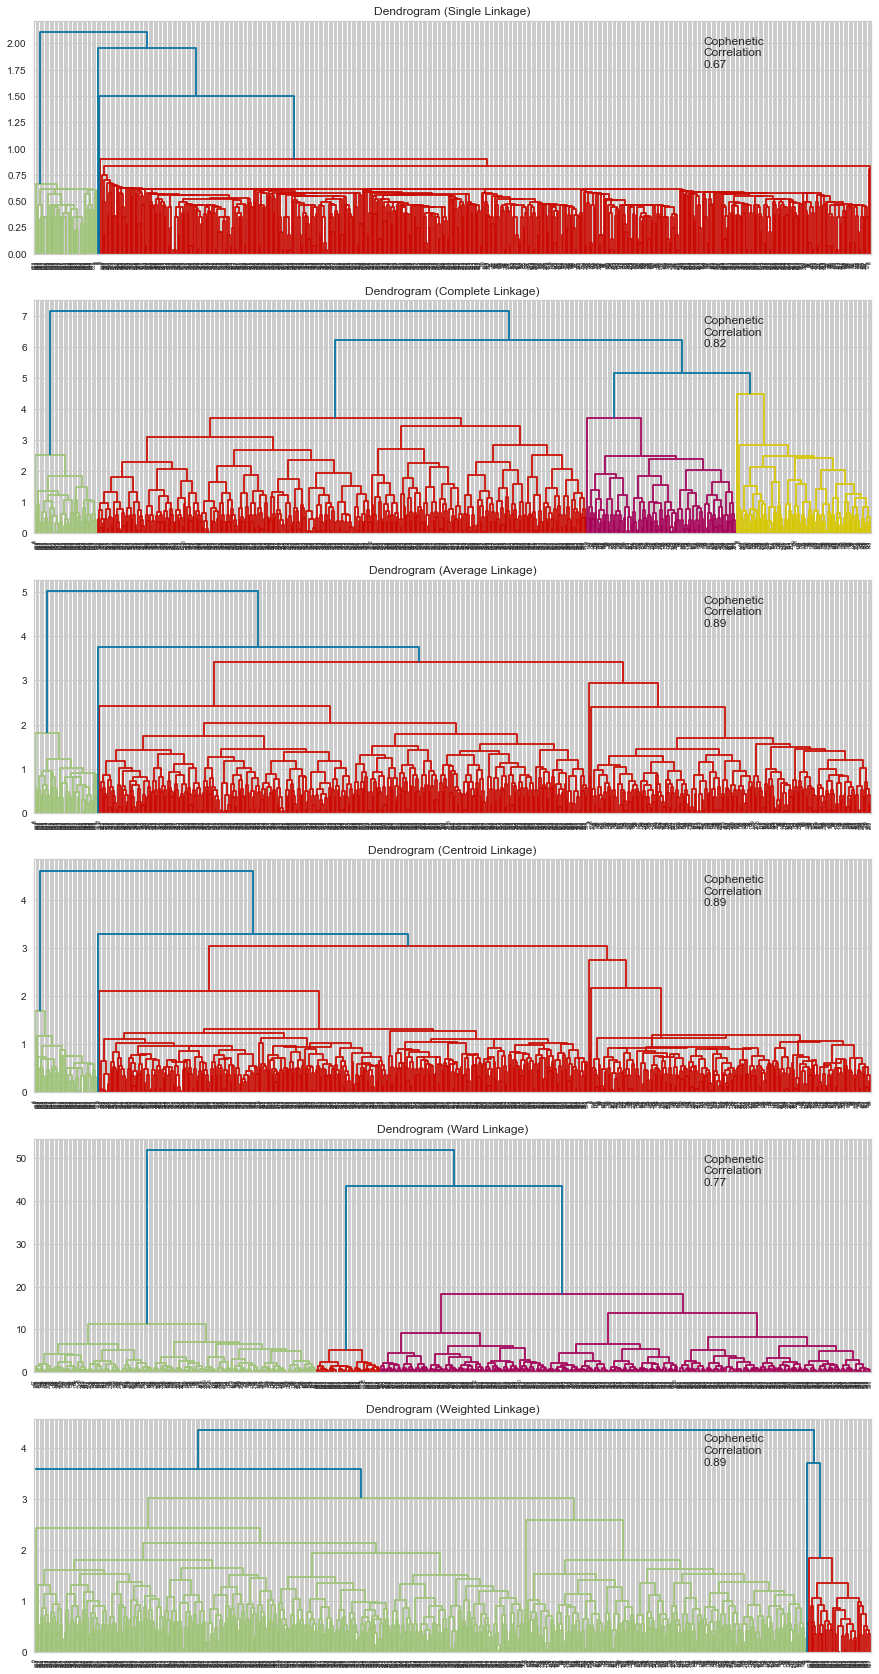

In [61]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [62]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.67
1,complete,0.82
2,average,0.89
3,centroid,0.89
4,ward,0.77
5,weighted,0.89


**Observations**
- The cophenetic correlation is highest for average, centroid and weighted linkage methods.
- We will move ahead with average linkage.
- 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [63]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [64]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [65]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,100000,2,1,1.00,0,2
1,50000,3,0,8.50,9,4
2,50000,7,1,3.00,4,0
3,30000,5,1,1.00,4,0
4,100000,6,0,8.50,3,3


In [66]:
data.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
655,99000,10,1,8.50,0,3
656,84000,10,1,8.50,2,3
657,105000,8,1,8.50,1,3
658,105000,10,1,8.50,0,3
659,105000,9,0,8.50,2,3


# Hierachical Cluster Profiling

In [67]:
h_cluster_profile = data.groupby("HC_Clusters").mean()

In [68]:
data.HC_Clusters.value_counts()

0    386
1    222
3     50
4      1
2      1
Name: HC_Clusters, dtype: int64

In [69]:
h_cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values)

In [70]:
# let's display cluster profiles
h_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33541.45,5.52,3.49,0.98,2.01,386
1,12027.03,2.40,0.93,3.53,6.87,222
2,100000.00,2.00,1.00,1.00,0.00,1
3,102660.00,8.74,0.60,8.18,1.08,50
4,50000.00,3.00,0.00,8.50,9.00,1


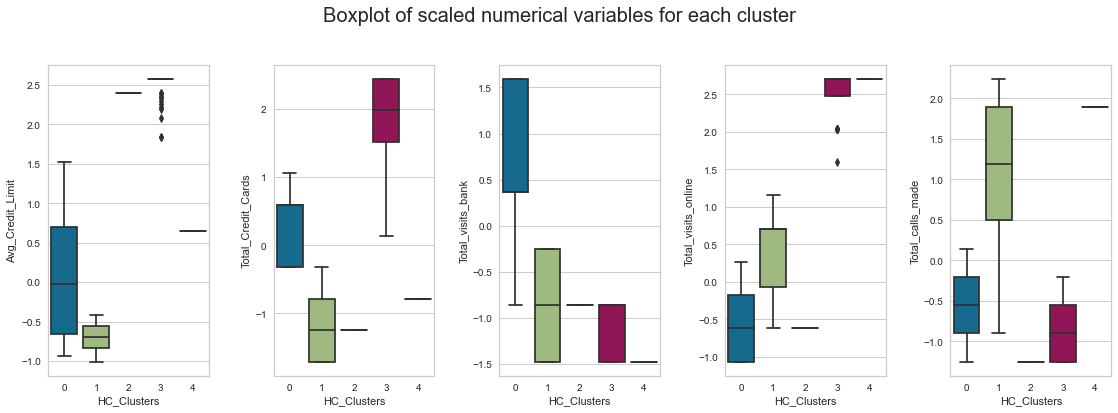

In [71]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

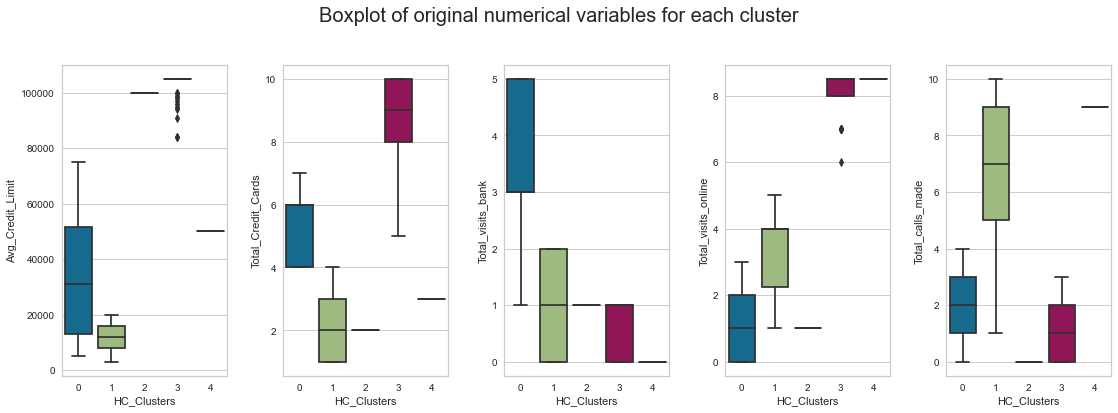

In [72]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

We will look into clusters 0, 1 and 3 only because the other 2 clusters have only 1 customer in them.

- **Cluster 0: The Personable Mass Affluent Customer**
    - This customer segment cluster contains some of the widest ranging average credit limit customers.
    - 50% of them have 4 to 6 credit cards.
    - They visit the bank the most per year at 3 to 5 times but visit or do online logins the least at an average of once a year and most don't do online more than 2 times.
    - They appear to be satisfied with the services going by the low average number of calls a year to the bank.

- **Cluster 1: The Dissatisfied Budget Customer**
    - This customer segment cluster has the lowest Average Credit Limit. 
    - They also have the lowest number of credit cards.
    - They visit the bank annually ranging from 0 to 2 times with an average of 1 time.
    - 50% of them visit or do online logins 2 to 4 times to the bank's website yearly.
    - They clock the highest number of calls to the banks with 50% of them making 5 to 9 calls yearly.
    
- **Cluster 3: The Tech Savvy Premium Customer**
    - This customer segment cluster appears to have the highest Average Credit Limit.
    - They also have the highest number of credit cards.
    - They visit the bank the lowest amount of times a year but visit or do online logins the most averaging 8 times yearly.
    - They make the lowest number of calls to the bank so it may mean they are pretty satisfied with the services.    

# Cluster Profiling Comparison

In [73]:
# K-Means Cluster Profile
display(cluster_profile)

print("\n")

# Hierachical Cluster Profile
display(h_cluster_profile)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.11,2.41,0.93,3.55,6.87,224
1,102660.00,8.74,0.60,8.18,1.08,50
2,33782.38,5.52,3.49,0.98,2.00,386


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33541.45,5.52,3.49,0.98,2.01,386
1,12027.03,2.40,0.93,3.53,6.87,222
2,100000.00,2.00,1.00,1.00,0.00,1
3,102660.00,8.74,0.60,8.18,1.08,50
4,50000.00,3.00,0.00,8.50,9.00,1


**Observations**
- On close observation, clusters 0, 1 and 2 from K-Means Clustering can be mapped directly to clusters 1, 3 and 0 from Hierachical Clustering.
- Apart from the mean of Avg_Credit_Limit having minute value differences,  other variable values are similar or very close to each other between mapped clusters from K-Means Clustering and Hierachical Clustering.
- There is 1 each customer from cluster 2 and 4 from Hierachical Clustering which K-Means  Clustering do not have. 
- Hierachical Clustering cluster 2 appears to be a premium customer but this customer has few credit cards and does not interact with the bank meaningfully. The customer might be showing signs of churning.
- Hierachical Clustering cluster 4 appears to be a mass affluent customer who has few credit cards, never visits the bank and utilizes many online visits to the bank website and registered a total of 9 calls on average to the bank yearly. This is an example of a frustrated customer who called in many times for support.

## Insights From both K-Means and Hierachical Clustering

Consolidating Insights from both clustering techniques.

- **The Dissatisfied Budget Customer**
    - This customer segment cluster has the lowest Average Credit Limit. 
    - They also have the lowest number of credit cards.
    - They visit the bank annually ranging from 0 to 2 times with an average of 1 time.
    - 50% of them visit or do online logins 2 to 4 times to the bank's website yearly.
    - They clock the highest number of calls to the banks with 50% of them making 5 to 9 calls yearly.

- **The Personable Mass Affluent Customer**
    - This customer segment cluster contains some of the widest ranging average credit limit customers.
    - 50% of them have 4 to 6 credit cards.
    - They visit the bank the most per year at 3 to 5 times but visit or do online logins the least at an average of once a year and most don't do online more than 2 times.
    - They appear to be satisfied with the services going by the low average number of calls a year to the bank.
   
- **The Tech Savvy Premium Customer**
    - This customer segment cluster appears to have the highest Average Credit Limit.
    - They also have the highest number of credit cards.
    - They visit the bank the lowest amount of times a year but visit or do online logins the most averaging 8 times yearly.
    - They make the lowest number of calls to the bank so it may mean they are pretty satisfied with the services.

# Business Insights and Recommendations
- **The Dissatisfied Budget Customer**
    - This cluster seems to contain budget customers with the lowest number of credit cards. 
    - They registered the highest amount of calls to the bank which may suggest dissatisfaction with the bank services in this customer segment. 
    - Numbering 1/3 of all customers, attention needs to be paid to this group of budget customers on improving quality of services.
    
- **The Personable Mass Affluent Customer**
    - This cluster has the mass affluent band of customers constituting slightly over half of all customers. 
    - This band of customers with the average credit limit of 75 percentile and above can be upsell to premium customers as their credit limit rivals that of the premium customers. 
    - They can also be persuaded to have more credit cards with the bank and use more online banking services. 
    - The opportunity to market it to them can be when they visit the banks as most of them in this profile prefer to and a more personable sales pitch can be conducted.
    
- **The Tech Savvy Premium Customer**
    - This cluster appears to contain the premium customers with the highest average credit limit and number of credit cards. 
    - However their numbers are low at less than 10% of all customers. 
    - Since they may bring more profit margin to the bank, their numbers have to be increased and the best opportunity comes from upselling to the Personable Mass Affluent Customer.

**Comments on additional data sources for model improvement**
- Additional data can be obtained from dissatisfied customers' feedback in the budget range to understand their pain points and design intervention methods to address their concerns.

- Demographics of the customers can be obtained to help in targeted marketing techniques. Chances are the Personable Mass Affluent Customer segment has a high number of older customers prefer to visit the bank for their banking needs thus more effort can be spent on encouraging them to move online. 

**Model implementation in real world and potential business benefits from model**
- The model implemented in the real world will help in finding out the customer segment to target with our customized upsell marketing efforts and generate more profit margin. 

- In addition, the concerns of the Dissatisfied Budget Customer can be uncovered and addressed by identifying them and gathering feedback from the right customers to improve service offerings and reduce customer churn.

**Other Recommendations**
- Identify current Tech Savvy Premium Customer who were upsold in the past vs unsuccessful upsold customers can help in building a supervised learning predictive model to more accurately identify customers with high potential for a successful upsell effort.